<a href="https://colab.research.google.com/github/xzhepatology/MELDscoreDatathon-4/blob/main/D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/mhealth.csv'
data = pd.read_csv(file_path)
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
# Group the dataset by the 'patient_nbr' column and apply the `len` function
# to each group. This counts the number of records for each patient.
# The result is a series where the index is 'patient_nbr' and the value is the count of records.
patients_with_2_or_more_records = (data.groupby('subject').apply(len) >= 2)

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'patient_nbr'
# and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `diabetes_data` so that it only includes rows where 'patient_nbr'
# matches those in the `patients_with_2_or_more_records` series that are True.
patients_with_2_or_more_records_df = data[data['subject'].isin(patients_with_2_or_more_records[patients_with_2_or_more_records].index)]


In [5]:
# Update the original 'data' dataframe with the filtered dataframe.
# This step replaces the original dataset with the subset of patients who have 2 or more records.
data = patients_with_2_or_more_records_df

In [6]:
# Calculating the missing threshold based on the sampled data
missing_threshold = 0.5 * len(data)

# Replacing '?' with NaN in the 'activity' column
data['Activity'] = data['Activity'].replace('?', np.nan)

# Identifying columns with more than 50% missing values in the sampled data
columns_to_drop = data.columns[data.isnull().sum() > missing_threshold]

# Calculating the number of missing values in each column of the sampled dataset
missing_values = data.isnull().sum()

missing_values, columns_to_drop

(alx         0
 aly         0
 alz         0
 glx         0
 gly         0
 glz         0
 arx         0
 ary         0
 arz         0
 grx         0
 gry         0
 grz         0
 Activity    0
 subject     0
 dtype: int64,
 Index([], dtype='object'))

In [7]:
def map_activity(original_label):
    if original_label == 0:
        return 0
    elif original_label in [1, 2, 3]:
        return 1
    elif original_label in [4, 5, 6, 7, 8]:
        return 2
    elif original_label in [9, 10, 11, 12]:
        return 3

data['Activity'] = data['Activity'].apply(map_activity)


In [8]:
description = data.describe()
description

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,0.562448
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,0.988348
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,1.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,3.000000


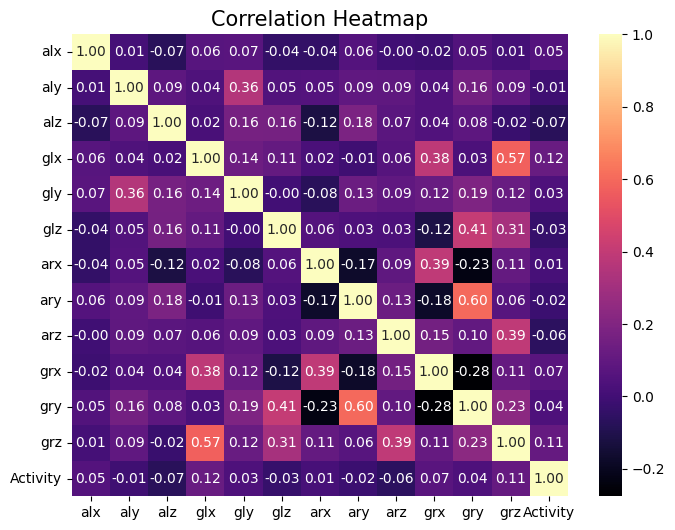

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For the correlation heatmap, we'll use only numerical columns.
numerical_features = [
    col for col in data.select_dtypes(include=[np.number]).columns
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = data[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

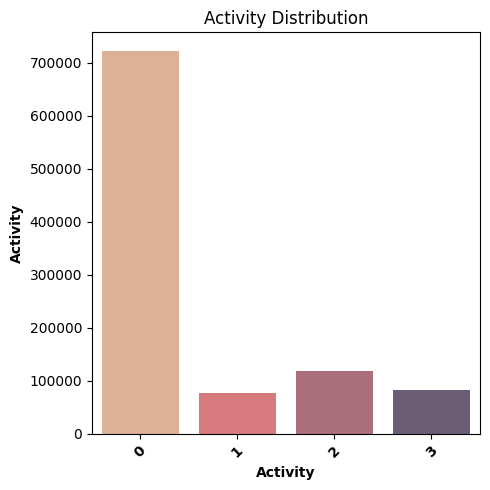

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns


# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=data)
plt.title('Activity Distribution')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Activity', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

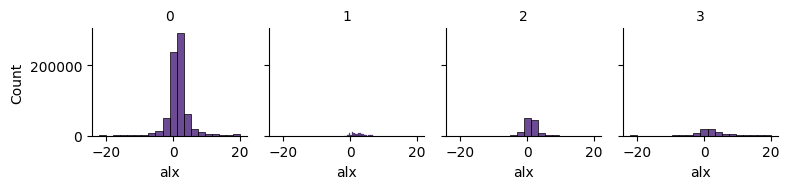

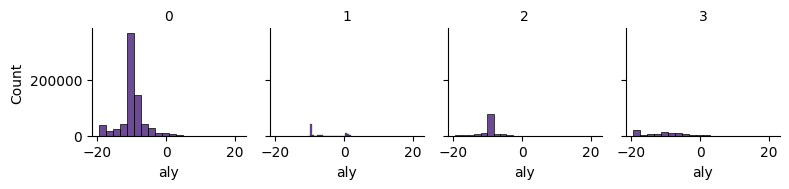

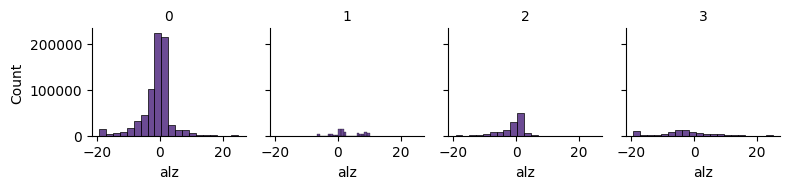

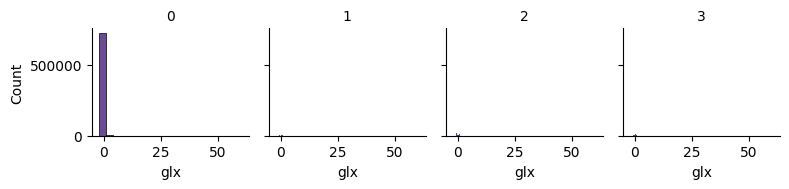

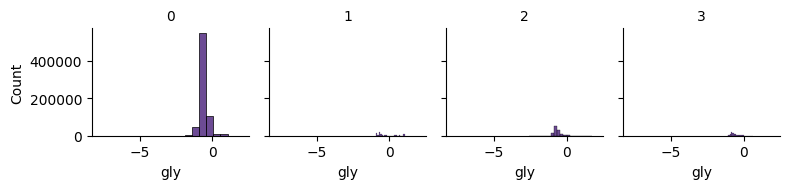

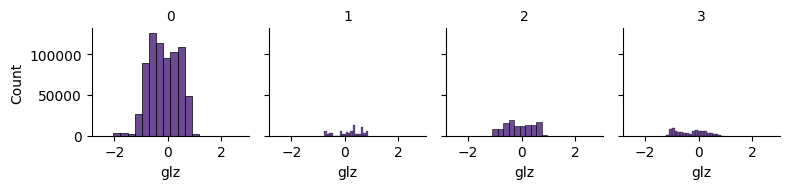

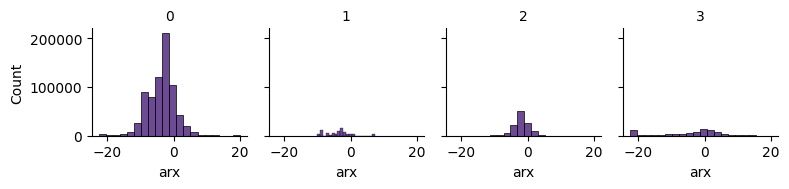

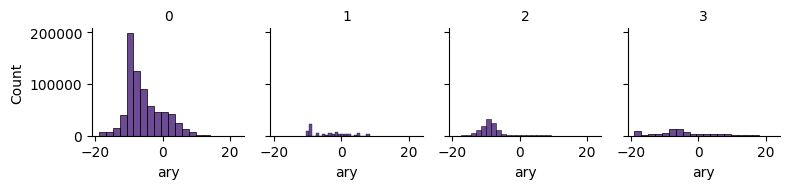

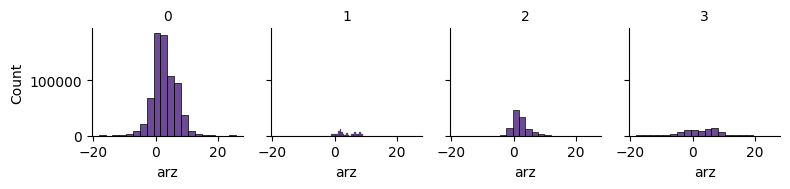

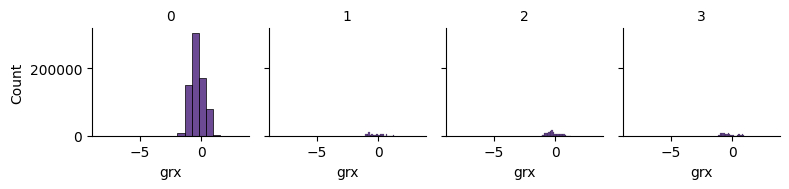

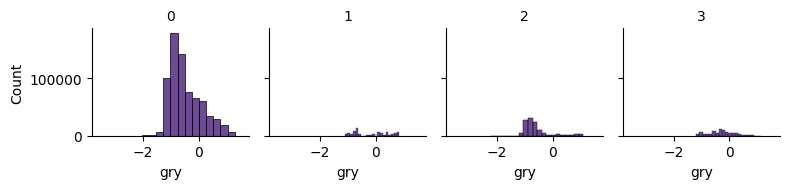

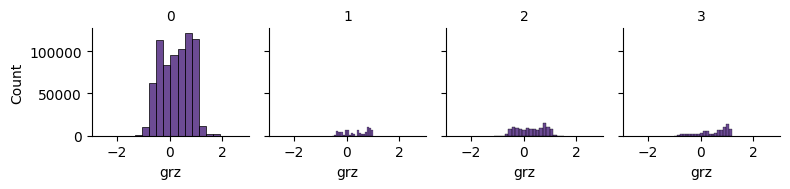

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns_for_analysis = [
    'alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz'
]

# Get a color from the 'magma' colormap
color = plt.get_cmap('magma')(0.2)  # 0.2 is arbitrarily chosen to get a distinct color from the colormap

# Create a FacetGrid for each column in 'selected_columns_for_analysis'
for column in selected_columns_for_analysis:
    g = sns.FacetGrid(data, col='Activity', height=2, aspect=1)
    g.map(sns.histplot, column, bins=20, kde=False, color=color)

    # Updating titles and labels according to your dataset
    g.set_titles('{col_name}')
    g.set_xlabels(column)
    g.set_ylabels('Count')

    plt.show()


In [12]:
# Identifying categorical columns excluding 'subject'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('subject')  # Exclude 'subject' from encoding

# Applying one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Displaying the shape of the new dataframe
df_encoded_shape = df_encoded.shape
df_encoded_shape

(999999, 14)

In [13]:
def train_val_split_sequential(data, test_size=0.2):
    unique_subjects = data['subject'].unique()
    train_df_list = []
    val_df_list = []

    for subject in unique_subjects:
        subject_data = data[data['subject'] == subject]
        split_index = int(len(subject_data) * (1 - test_size))
        train_df_list.append(subject_data.iloc[:split_index])
        val_df_list.append(subject_data.iloc[split_index:])

    train_df = pd.concat(train_df_list)
    val_df = pd.concat(val_df_list)

    return train_df, val_df

# Using the function with your DataFrame named 'data'
train_df, val_df = train_val_split_sequential(data, test_size=0.2)

# Displaying the shape of the training and validation sets
print(train_df.shape, val_df.shape)



(799995, 14) (200004, 14)


In [14]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'Activity')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
val_df[numerical_columns] = scaler.transform(val_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.211587,-0.058404,0.258383,0.272688,-0.644037,-1.038544,-1.103325,0.188428,-0.663531,-0.302465,-0.985973,-0.431338,0,subject1
1,0.270351,-0.010457,0.268728,0.235598,-0.638777,-1.031280,-1.098463,0.233811,-0.707272,-0.302465,-0.985973,-0.431338,0,subject1
2,0.276439,-0.025550,0.268190,0.235598,-0.638777,-1.031280,-1.071986,0.241296,-0.640095,-0.302465,-0.985973,-0.431338,0,subject1
3,0.210573,0.009336,0.242714,0.235598,-0.638777,-1.031280,-1.098550,0.234426,-0.615636,-0.317552,-0.982316,-0.446865,0,subject1
4,0.278961,0.019805,0.274003,0.235598,-0.638777,-1.031280,-1.114372,0.264366,-0.605039,-0.317552,-0.982316,-0.446865,0,subject1


In [15]:
# Checking the class distribution in the 'Activity' column
class_distribution = train_df['Activity'].value_counts()

# Displaying the class distribution
print(class_distribution)


0    563759
2    107164
1     75620
3     53452
Name: Activity, dtype: int64


In [16]:
len(train_df['subject'].unique())

9

In [17]:
# Grouping the original training data by 'Activity'
grouped_by_activity = train_df.groupby('Activity')

# Creating separate DataFrames for each class
groups_class_0 = grouped_by_activity.get_group(0)
groups_class_1 = grouped_by_activity.get_group(1)
groups_class_2 = grouped_by_activity.get_group(2)
groups_class_3 = grouped_by_activity.get_group(3)

In [19]:
from sklearn.utils import resample

# Determine the number of samples in group 0
group_0_size = len(groups_class_0)

# Oversample other groups to match the size of group 0
oversampled_group_class_1 = resample(groups_class_1,
                                     replace=True,    # Enable replacement to increase size
                                     n_samples=group_0_size,
                                     random_state=42)

oversampled_group_class_2 = resample(groups_class_2,
                                     replace=True,
                                     n_samples=group_0_size,
                                     random_state=42)

oversampled_group_class_3 = resample(groups_class_3,
                                     replace=True,
                                     n_samples=group_0_size,
                                     random_state=42)

# Create a list including the original group 0 and oversampled other groups
balanced_groups = [groups_class_0, oversampled_group_class_1, oversampled_group_class_2, oversampled_group_class_3]



In [20]:
# Combine all groups to create a balanced dataset
train_df_balanced = pd.concat(balanced_groups, ignore_index=True)


In [21]:
# Displaying the counts of different activities in the balanced training dataset
activity_counts = train_df_balanced['Activity'].value_counts()

# Printing the activity counts
print(activity_counts)

0    563759
1    563759
2    563759
3    563759
Name: Activity, dtype: int64


In [28]:
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=100)
X_test, y_test = create_sequences(val_df, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22550, 100, 12), (22550,), (2000, 100, 12), (2000,))

In [36]:
import torch as t

# Convert your prepared sequences and targets to PyTorch tensors
padded_sequences = t.tensor(X_train, dtype=t.float32)  # Replace X_train with your training sequences
targets = t.tensor(y_train, dtype=t.long)  # Replace y_train with your training labels

padded_sequences_test = t.tensor(X_test, dtype=t.float32)  # Replace X_test with your testing sequences
targets_test = t.tensor(y_test, dtype=t.long)  # Replace y_test with your testing labels

In [37]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]  # Assuming padded_sequences has shape (num_samples, sequence_length, num_features)
hidden_size = 256  # Number of hidden units in RNN
num_classes = 4  # Adjusted for four-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.000001  # Regularization term (lambda)

# Data preparation
# Assuming padded_sequences and targets are your processed training data and labels
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Assuming padded_sequences_test and targets_test are your processed test data and labels
test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling
    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/30 ---> Train Accuracy: 50.57649667405765%, Validation Accuracy: 7.15%
Epoch 1/30 ---> Train Accuracy: 72.89578713968957%, Validation Accuracy: 17.05%
Epoch 2/30 ---> Train Accuracy: 74.96674057649668%, Validation Accuracy: 17.95%
Epoch 3/30 ---> Train Accuracy: 79.21507760532151%, Validation Accuracy: 30.1%
Epoch 4/30 ---> Train Accuracy: 81.960088691796%, Validation Accuracy: 33.9%
Epoch 5/30 ---> Train Accuracy: 84.13747228381375%, Validation Accuracy: 42.7%
Epoch 6/30 ---> Train Accuracy: 85.80931263858093%, Validation Accuracy: 46.6%
Epoch 7/30 ---> Train Accuracy: 85.9689578713969%, Validation Accuracy: 50.3%
Epoch 8/30 ---> Train Accuracy: 84.83813747228382%, Validation Accuracy: 42.05%
Epoch 9/30 ---> Train Accuracy: 86.39467849223946%, Validation Accuracy: 51.5%
Epoch 10/30 ---> Train Accuracy: 86.27937915742794%, Validation Accuracy: 51.2%
Epoch 11/30 ---> Train Accuracy: 85.89356984478935%, Validation Accuracy: 55.5%
Epoch 12/30 ---> Train Accuracy: 87.60532150776054

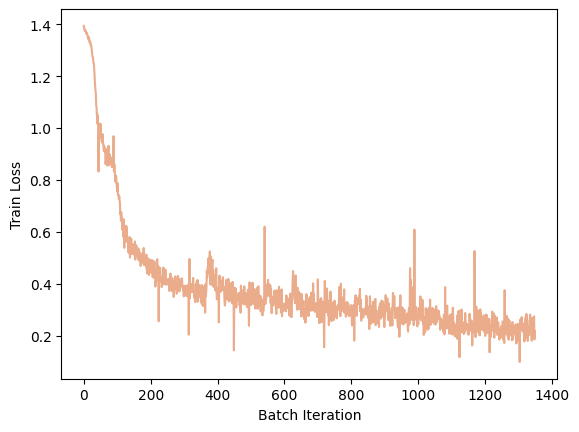

In [38]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

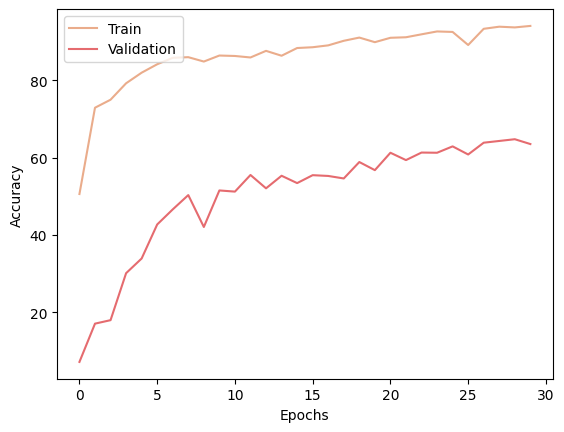

In [39]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [40]:


# Initialize arrays for true labels and predictions
true_labels = []
predictions = []

# Collect predictions and true labels for test data
rnn_layer1.eval()
fc_layer1.eval()
fc_layer2.eval()
with t.no_grad():
    for X, Y in test_data_loader:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]
        out = relu(fc_layer1(out))
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)

        # Append to lists
        true_labels.extend(Y.tolist())
        predictions.extend(predicted.tolist())

# Convert lists to tensors for further analysis
true_labels = t.tensor(true_labels)
predictions = t.tensor(predictions)


Confusion Matrix:
 [[1126  103  210  132]
 [  12    8    0    0]
 [  67    7   41    8]
 [ 142    0   49   95]]


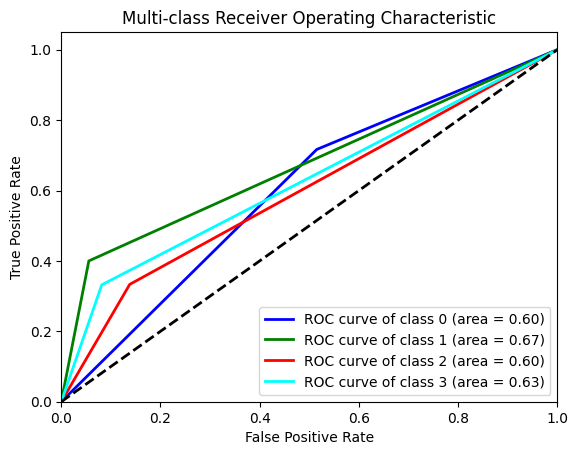

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:\n", cm)

# Compute ROC curve and ROC area for each class
n_classes = num_classes  # Assuming num_classes is defined as above
fpr = dict()
tpr = dict()
roc_auc = dict()

# Prepare one-hot encoded true labels
Y_test_one_hot = t.nn.functional.one_hot(true_labels, n_classes).numpy()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot[:, i], predictions == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

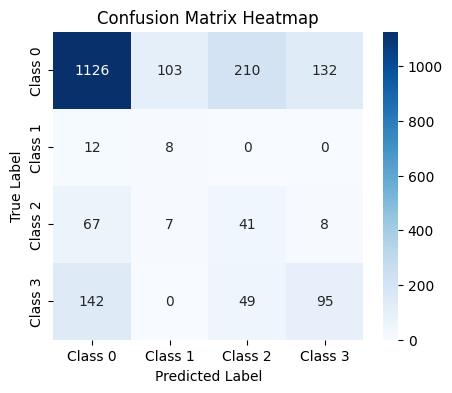

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(num_classes)], yticklabels=[f"Class {i}" for i in range(num_classes)])
plt.title("Confusion Matrix Heatmap")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [43]:
from sklearn.metrics import classification_report

# Assuming true_labels and predictions are your true labels and model predictions
report = classification_report(true_labels, predictions, target_names=[f'Class {i}' for i in range(num_classes)])
print(report)


              precision    recall  f1-score   support

     Class 0       0.84      0.72      0.77      1571
     Class 1       0.07      0.40      0.12        20
     Class 2       0.14      0.33      0.19       123
     Class 3       0.40      0.33      0.36       286

    accuracy                           0.64      2000
   macro avg       0.36      0.45      0.36      2000
weighted avg       0.72      0.64      0.67      2000

